Optimal decomposition into XX(theta) family of basis gates, for discrete theta.
https://arxiv.org/pdf/2111.02535.pdf

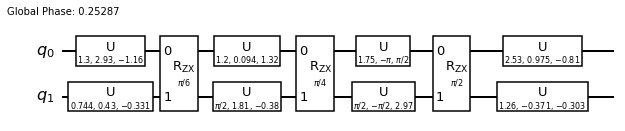

In [9]:
from qiskit import transpile
from qiskit.circuit import QuantumRegister, QuantumCircuit, Parameter
from qiskit.quantum_info.synthesis.xx_decompose import XXDecomposer
from qiskit.quantum_info import random_unitary
import numpy as np

u = random_unitary(4)

decomposer = XXDecomposer(euler_basis='U')
output_circuit = decomposer(u, basis_fidelity=0.99, approximate=True)
output_circuit.draw('mpl', style='bw')

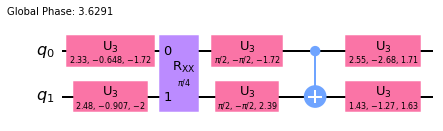

In [3]:
# emit XX everywhere
xx_circuit = QuantumCircuit(2)
theta = Parameter('theta')
xx_circuit.rxx(theta, 0, 1)

# except at theta=pi/2, emit CX
cx_circuit = QuantumCircuit(2)
cx_circuit.h(0)
cx_circuit.cx(0, 1)
cx_circuit.h(1)
cx_circuit.s(0)
cx_circuit.s(1)
cx_circuit.h(0)
cx_circuit.h(1)
cx_circuit.global_phase += np.pi / 4
embodiments = {t: xx_circuit.bind_parameters({theta: t}) for t in [np.pi/4, np.pi/6]}
embodiments.update({np.pi/2: cx_circuit})

decomposer = XXDecomposer(euler_basis='U3', embodiments=embodiments)
output_circuit = decomposer(u, basis_fidelity=.99)
output_circuit.draw('mpl')

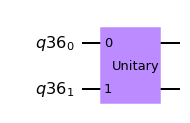

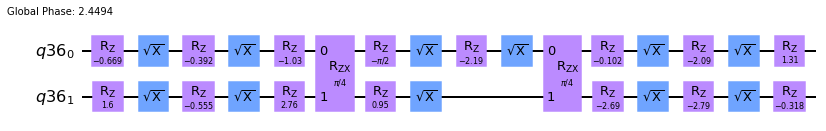

In [11]:
from qiskit import transpile, QuantumRegister, QuantumCircuit
from qiskit.quantum_info import random_unitary
import numpy as np

# generate a random unitary
u = random_unitary(4)

q = QuantumRegister(2)
circuit = QuantumCircuit(q)
circuit.append(u, q)
output_circuit, = transpile([circuit], basis_gates=['rzx', 'rz', 'sx'], approximation_degree=0.99)

display(circuit.draw('mpl'))
display(output_circuit.draw('mpl'))